# Indian Premier League

#### Importing packages

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Data Wrangling

This document explores a dataset containing players statistics and attributes for approximately 15640 ball by ball deliveries and number of matches played in IPL from 2008 to 2017
### Gathering data

In [302]:
#loading the two data sets into dataframe
delivery_data = pd.read_csv('deliveries.csv',)
matches_data = pd.read_csv('matches.csv')

   # Assessing data

### Visual Assesment

In [303]:
delivery_data.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
77745,330,1,Kings XI Punjab,Kolkata Knight Riders,16,1,P Dogra,AD Mascarenhas,B Lee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
58848,249,1,Deccan Chargers,Kings XI Punjab,9,4,S Dhawan,KC Sangakkara,VS Malik,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
124415,524,2,Mumbai Indians,Kings XI Punjab,17,2,Harbhajan Singh,J Suchith,Anureet Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
69180,293,1,Kings XI Punjab,Delhi Daredevils,9,4,SE Marsh,PC Valthaty,JR Hopes,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
102427,432,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,5,V Kohli,CH Gayle,NLTC Perera,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [304]:
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Programmatic Assesment

In [305]:
delivery_data.shape

(150460, 21)

In [306]:
delivery_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [307]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
match_id            150460 non-null int64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null object
over                150460 non-null int64
ball                150460 non-null int64
batsman             150460 non-null object
non_striker         150460 non-null object
bowler              150460 non-null object
is_super_over       150460 non-null int64
wide_runs           150460 non-null int64
bye_runs            150460 non-null int64
legbye_runs         150460 non-null int64
noball_runs         150460 non-null int64
penalty_runs        150460 non-null int64
batsman_runs        150460 non-null int64
extra_runs          150460 non-null int64
total_runs          150460 non-null int64
player_dismissed    7438 non-null object
dismissal_kind      7438 non-null object
fielder             5369 non-null object
dtype

In [308]:
delivery_data.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


### structure of the dataset

There are 150460 ball by ball deliveries in the dataset with 21 features ('match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball','batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs','bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed','dismissal_kind', 'fielder'). Most variables are numeric in nature, but the variables 'player_dismissed' ,'dismissal_kind','fielder' have some NaN values ( need not be dropped) but it doesn't effect our analysis and it is obvious with the data collected



### the main feature(s) of interest in this dataset?

I'm most interested in figuring out what features are best for predicting the top batsman and bowlers in the ipl

### What features in the dataset  will help support my investigation into my feature(s) of interest?

I expect that batsman_runs and player_dismissed will have the strongest effect on each player statistics: the larger the batsman_runs and player_dismissed , the higher the runs scored and wickets taken. I also think that the other big features would be batting_team and bowling_team where it shows the team each player belong to and his statistics

In [309]:
delivery_data.isnull().any()

match_id            False
inning              False
batting_team        False
bowling_team        False
over                False
ball                False
batsman             False
non_striker         False
bowler              False
is_super_over       False
wide_runs           False
bye_runs            False
legbye_runs         False
noball_runs         False
penalty_runs        False
batsman_runs        False
extra_runs          False
total_runs          False
player_dismissed     True
dismissal_kind       True
fielder              True
dtype: bool

In [310]:
sum(delivery_data.duplicated())

1

In [311]:
matches_data.shape

(636, 18)

In [312]:
matches_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [313]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [314]:
matches_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


# structure of the dataset
There are 636 ball matches data in the dataset with 18 features ('id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs','win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2','umpire3'). Most variables are object in nature, but the variables 'umpire3' has NAN values it needs to be dropped 

# the main feature(s) of interest in this dataset?
I'm most interested in figuring out what features are best for predicting the best team in the ipl

# What features in the dataset will help support my investigation into my feature(s) of interest?
I expect that player_of_match will have the strongest effect on each player statistic. I also think that the other big features would be 'winner' where it shows which team has won in 636 matches

In [315]:
matches_data.isnull().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [316]:
sum(matches_data.duplicated())

0

# Delivery_data table
#### drop that one duplicate value found in programmatic assessment 
#### replace the team names with abbrevations that would fit easy in visualizations


# Matches_data table
#### drop the umpire 3 column because all the values are null
####  replace the team names with abbrevations that would fit easy in visualizations

# Cleaning

In [317]:
# define( dropping duplicate values)
#code
delivery_data.drop_duplicates(inplace=True)
#test
sum(delivery_data.duplicated())

0

In [318]:
#define( drop the umpire column in matches data set)
#code
matches_data.drop(['umpire3'],axis=1,inplace=True)
#test
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
dtypes: int64(5), object(12)
memory usage: 84.5+ KB


In [319]:
#define( replace the team names with abbrevations for both data frames)
#code
matches_data.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

delivery_data.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)
#test
matches_data.head()
delivery_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Analysis and Visualization

### Number of matches played and won by each team

In [320]:
matches_played_byteams=pd.concat([matches_data['team1'],matches_data['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=matches_data['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)

trace1 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['Total Matches'],
    name='Total Matches played'
)
trace2 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['wins'],
    name='Total Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

### Number of matches played in each season

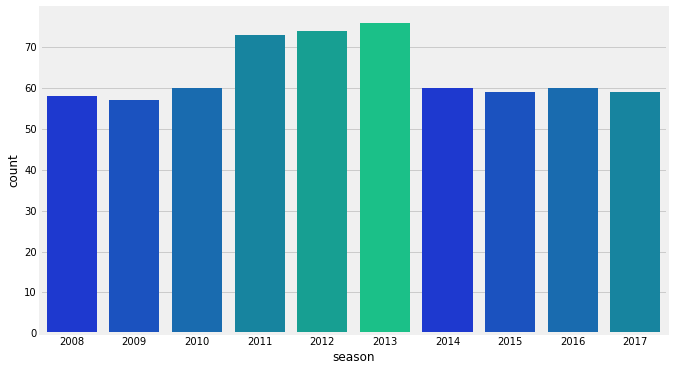

In [321]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches_data,palette=sns.color_palette('winter'))
plt.show()

### Best Player of the match

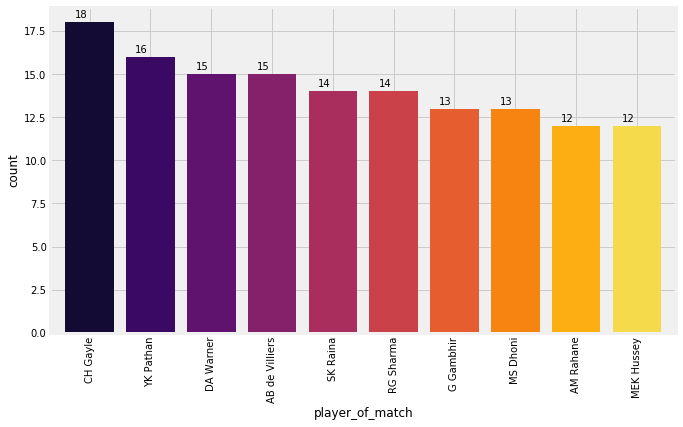

In [322]:
plt.subplots(figsize=(10,6))
axis = matches_data['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
axis.set_xlabel('player_of_match') 
axis.set_ylabel('count')
for p in axis.patches:
    axis.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

### Top Batsman 
**univariate exploration**

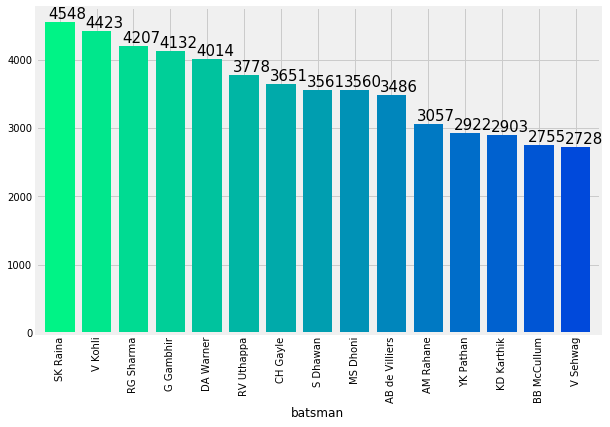

In [323]:

plt.subplots(figsize=(9,6))
max_runs=delivery_data.groupby(['batsman'])['batsman_runs'].sum()
axis=max_runs.sort_values(ascending=False)[:15].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in axis.patches:
    axis.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
plt.show()

#### Comparing Batsman

In [324]:
balls=delivery_data.groupby(['batsman'])['ball'].count().reset_index()
runs=delivery_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball':'ball_x','batsman_runs':'ball_y'},axis=1,inplace=True)
sixes=delivery_data.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=delivery_data.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
balls['strike_rate']=balls['ball_y']/balls['ball_x']*100
balls=balls.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
balls=balls.merge(fours,left_on='batsman',right_on='batsman',how='outer')
compare=delivery_data.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman','batting_team'])['batsman_runs'].max().reset_index()
balls=balls.merge(compare,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball_x':'balls','ball_y':'runs','batsman_runs_x':"6's",'batsman_runs_y':"4's",'batting_team':'Team','batsman_runs':'Highest_score'},axis=1,inplace=True)
balls.sample(5)

,batsman,balls,runs,strike_rate,6's,4's,Team,Highest_score
568,RA Jadeja,1458,1732,118.792867,125,57,KTK,47
408,MC Henriques,769,969,126.007802,87,27,RCB,44
425,MK Pandey,1901,2223,116.938453,197,65,KKR,94
663,SM Pollock,116,147,126.724138,12,8,MI,33
627,S Sohal,311,368,118.327974,34,18,DC,62


**Multivariate Exploration**

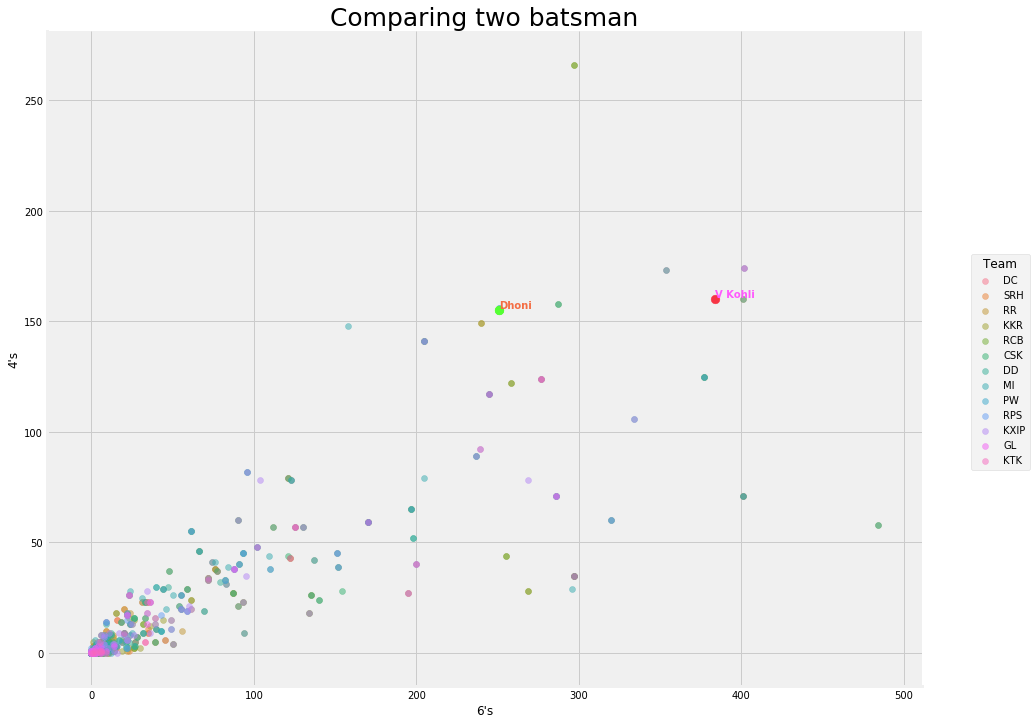

In [325]:

def batsman_comparator(stat1,stat2,batsman1,batsman2):
    sns.FacetGrid(balls,hue='Team',size=8).map(plt.scatter, stat1,stat2, alpha=0.5).add_legend()
    bats1=balls[balls['batsman'].str.contains(batsman1)].sort_values(by=stat1,ascending=False)
    bats2=balls[balls['batsman'].str.contains(batsman2)].sort_values(by=stat1,ascending=False)
    plt.scatter(bats1[stat1],bats1[stat2]-1,s=75,c='#55ff33')
    plt.text(x=bats1[stat1].values[0],y=bats1[stat2].values[0],s=batsman1,
            fontsize=10, weight='bold', color='#f46d43')
    plt.scatter(bats2[stat1],bats2[stat2],s=75,c='#f73545')
    plt.text(x=bats2[stat1].values[0],y=bats2[stat2].values[0]+1,s=batsman2, 
            fontsize=10, weight='bold', color='#ff58fd')
    plt.gcf().set_size_inches(15,10)
    plt.title('Comparing two batsman',size=25)
    plt.show()

batsman_comparator("6's","4's",'Dhoni','V Kohli') #comparing the players Dhoni and V kohli based on their respective boundaries

### Highest scores 

In [326]:
highest_scores = delivery_data.groupby([ "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
highest_scores.sort_values('batsman_runs', ascending=0).head(5)
highest_scores.nlargest(5,'batsman_runs')

,batsman,batting_team,batsman_runs
735,V Kohli,RCB,4423
656,SK Raina,CSK,3707
144,CH Gayle,RCB,3175
577,RG Sharma,MI,3037
230,G Gambhir,KKR,3035


### Top Batsman Individual scores

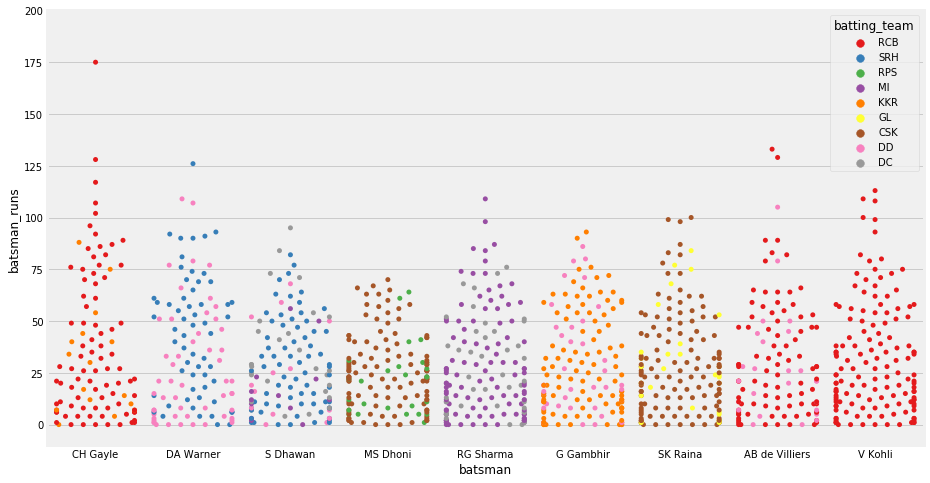

In [327]:
players=['CH Gayle','V Kohli','G Gambhir','SK Raina','RG Sharma','MS Dhoni','AB de Villiers','DA Warner', 'S Dhawan',]
scores = delivery_data.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
scores=scores[top_scores['batsman'].isin(players)]
sns.swarmplot(x='batsman',y='batsman_runs',data=scores,hue='batting_team',palette='Set1')
fig=plt.gcf()
fig.set_size_inches(14,8)
plt.ylim(-10,200)
plt.show()

# Top Bowlers

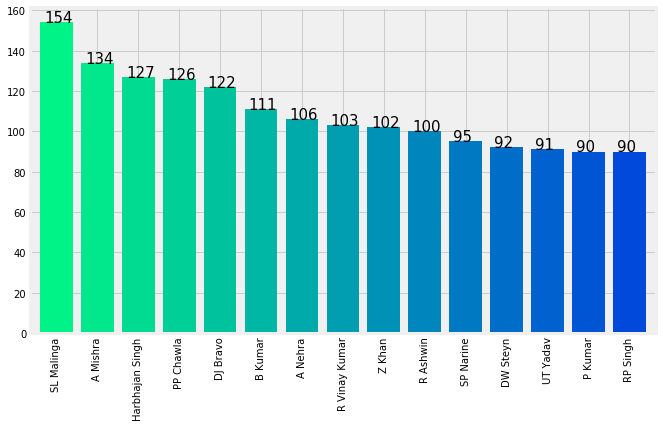

In [328]:
plt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"] 
ct=delivery_data[delivery_data["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:15].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()),fontsize=15)
plt.show()

In [329]:
bowlers=delivery_data.groupby('bowler').sum().reset_index()
bowl=delivery_data['bowler'].value_counts().reset_index()
bowlers=bowlers.merge(bowl,left_on='bowler',right_on='index',how='left')
bowlers=bowlers[['bowler_x','total_runs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','total_runs':'runs_given','bowler_y':'balls'},axis=1,inplace=True)
bowlers['overs']=(bowlers['balls']//6)
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
ct=delivery_data[delivery_data["dismissal_kind"].isin(dismissal_kinds)]
ct=ct['bowler'].value_counts()[:10].reset_index()
bowlers=bowlers.merge(ct,left_on='bowler',right_on='index',how='left').dropna()
bowlers=bowlers[['bowler_x','runs_given','overs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','bowler_y':'wickets'},axis=1,inplace=True)
bowlers['economy']=(bowlers['runs_given']/bowlers['overs'])
bowlers.head()

,bowler,runs_given,overs,wickets,economy
5,A Mishra,3305,450,134.0,7.344444
7,A Nehra,2537,329,106.0,7.711246
50,B Kumar,2410,342,111.0,7.046784
88,DJ Bravo,2815,351,122.0,8.019943
117,Harbhajan Singh,3453,498,127.0,6.933735


In [330]:
trace = go.Scatter(
    y = bowlers['wickets'],
    x = bowlers['bowler'],
    mode='markers',
    marker=dict(
        size= bowlers['wickets'].values,
        color = bowlers['economy'].values,
        colorscale='Viridis',
        showscale=True,
        colorbar = dict(title = 'Economy'),
    ),
    text = bowlers['overs'].values
)
data = [(trace)]

layout= go.Layout(
    autosize= True,
    title= 'Top 10 Wicket Taking Bowlers',
    hovermode= 'closest',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        title='Bowlers'
    ),
    yaxis=dict(
        title= 'Wickets Taken',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')